<h1>Top 1000 Highest Grossing Movies: What is the most popular genre?</h1>
<p>In this program, I process 'Top 1000 Highest Grossing Movies' dataset from Kaggle to find the most popular genre based on their grossing</p>
<p>Source: https://www.kaggle.com/datasets/sanjeetsinghnaik/top-1000-highest-grossing-movies</p>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf

<h2> Loading dataset </h2>

In [3]:
df = pd.read_csv(r'C:\Users\Nabilla Shafira\Documents\SQL\Highest Holywood Grossing Movies.csv')
list(df.columns)

['Unnamed: 0',
 'Title',
 'Movie Info',
 'Distributor',
 'Release Date',
 'Domestic Sales (in $)',
 'International Sales (in $)',
 'World Sales (in $)',
 'Genre',
 'Movie Runtime',
 'License']

<h2>SQL Query</h2>
Explore the distribution of movies across different genres. Identify the most popular genres and analyze how the sales vary across genres by grouping the genre with the total of sales

In [37]:
# Since 'UNNEST' function is not available here, I tried to use this method
# Removing the unwanted characters
df['Genre'] = df['Genre'].str.replace('[', '')
df['Genre'] = df['Genre'].str.replace(']', '')
df['Genre'] = df['Genre'].str.replace(' ', '')

#Unnesting
df_unnested = df.assign(Genre=df['Genre'].str.split(',')) \
               .explode('Genre') \
               .reset_index(drop=True)

#Query writing
query = """
        SELECT Genre, 
                SUM("Domestic Sales (in $)") AS "Total Domestic Sales (in $)", 
                SUM("International Sales (in $)") AS "Total International Sales (in $)",
                SUM("World Sales (in $)") AS "Total World Sales (in $)"
        FROM df_unnested 
        GROUP BY Genre
        ORDER BY "Total World Sales (in $)"
        """
focus = sqldf(query, globals()) #apply the query into datafrane
list (focus.Genre) #listing the genres
focus

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Genre,Total Domestic Sales (in $),Total International Sales (in $),Total World Sales (in $)
0,'Documentary',236424463,157708211,394132674
1,'Western',1731348406,1986265221,3717613627
2,'History',2834670753,3563646203,6398639386
3,'Sport',3615990793,2837254903,6453245696
4,'War',3769655255,3647185902,7249944157
5,'Biography',5106575366,4840788274,9947363640
6,'Music',4462133789,5736450679,10198584468
7,'Horror',5671605976,6544814064,12288802095
8,'Musical',9434264171,13747463213,22929353459
9,'Mystery',12695760687,18564237520,31177393515


<h2>Plotting the data</h2>
<p>Using matplotlib, I plotted the processed data above</p>

<AxesSubplot:xlabel='Genre'>

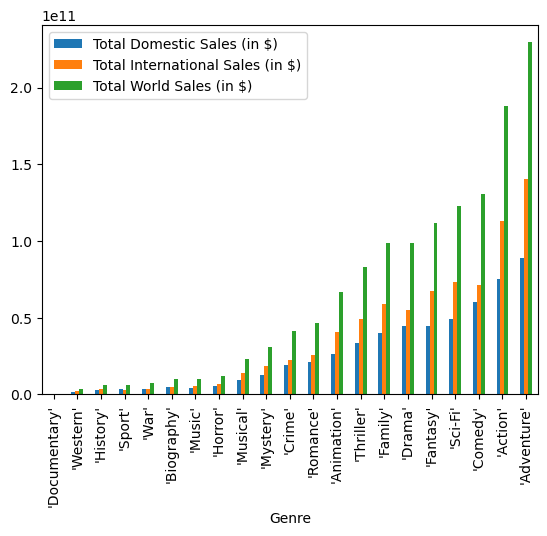

In [39]:
focus.plot(x="Genre", y=["Total Domestic Sales (in $)", "Total International Sales (in $)", "Total World Sales (in $)"], kind="bar")